In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIze = 256
CHANNELS = 3
EPOCHS = 50

In [10]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIze,IMAGE_SIze),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [11]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[2 1 0 0 0 2 1 1 1 0 0 0 2 2 0 0 2 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0]


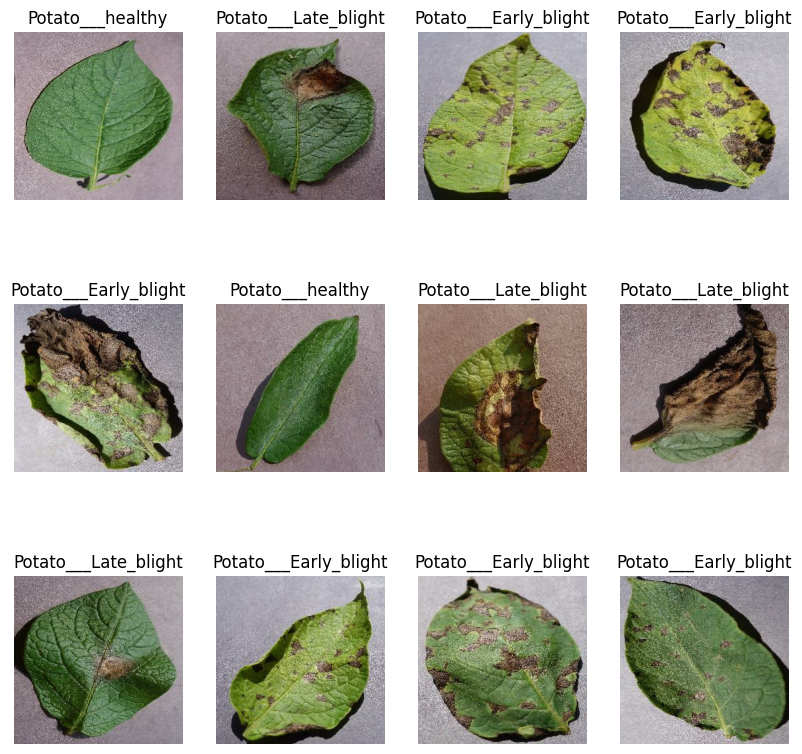

In [22]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [32]:
def get_dataset_partitision_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    assert(train_split+test_split+val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
        
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
        
    return train_ds, val_ds, test_ds

In [34]:
train_ds,val_ds,test_ds = get_dataset_partitision_tf(dataset)

In [35]:
len(train_ds)

54

In [36]:
len(val_ds)

6

In [39]:
# cache put image in to memory and will reduce the training time from loading form disk
train_ds = train_ds.cache().shuffle (1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle (1000).prefetch (buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle (1000).prefetch(buffer_size=tf.data.AUTOTUNE)